In [1]:
# Write a function to generate an m+1 dimensional data set, of size n, consisting of m continuous independent variables (X) and one dependent variable (Y) defined as yi = xiβ + e


In [24]:
import numpy as np

def generate_dataset(s, n, m): 
    X = np.hstack((np.ones((n, 1)), np.random.randn(n, m))) 
    
    beta = np.random.randn(m + 1)
    
    
    e = np.random.normal(0, s, n) 
    
 
    Y = X @ beta + e  #@ -> dot product or matrix multiplication between random vars and beta(parameters)  #y=b0+b1x1+b2x2........bnxn
    
    return X, Y, beta

s = 1.0 
n = 100
m = 5
X, Y, beta = generate_dataset(s, n, m)
print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("Beta:", beta)


# This function generates an n x m dataset with m independent variables and a dependent variable Y. The noise level in Y is controlled by σ, and the coefficients β are randomly generated.


X shape: (100, 6)
Y shape: (100,)
Beta: [-1.78973085 -0.22019119 -3.089695    0.22773255 -1.56720099 -0.58867316]


In [25]:
# 2 Write a function that learns the parameters of a linear regression line given inputs
# X: An n × m numpy array of independent variable values
# Y : The n × 1 numpy array of output values
# k: the number of iteractions (epochs)
# τ : the threshold on change in Cost function value from the previous to current iteration
#  λ: the learning rate for Gradient Descent

In [26]:
def linear_regression_gd(X, Y, k, tau, learning_rate):
    n, m = X.shape
    

    beta = np.random.randn(m)
    
   
    p_cost = float('inf')
    for iteration in range(k):
    
        Y_pred = X @ beta
        
        cost = np.mean((Y_pred - Y) ** 2) / 2  #mean squared error
        
        if np.abs(p_cost - cost) < tau:
            break
        
        p_cost = cost
        
        gradient = X.T @ (Y_pred - Y) / n
        
        beta -= learning_rate * gradient
        
    return beta, cost
k = 1000
tau = 1e-6
learning_rate = 0.01
beta_learned, final_cost = linear_regression_gd(X, Y, k, tau, learning_rate)
print("Learned Beta:", beta_learned)
print("Final Cost:", final_cost)


Learned Beta: [-1.62910284 -0.07651622 -3.26144097  0.30479771 -1.63329061 -0.50506019]
Final Cost: 0.523607280797248


In [27]:
# 3 Create a report investigating how differen values of n and σ impact the ability for your linear regression
# function to learn the coefficients, β, used to generate the output vector Y .

In [28]:
# To investigate the impact of different dataset sizes and noise levels on the linear regression model, you can run the above functions with varying values of n and σ, and compare the learned coefficients β with the true coefficients generated during dataset creation.

def differ_n_to_sigma(sigma_values, n_values, m, k, tau, learning_rate):  
    for sigma in sigma_values:
        for n in n_values:
            print(f"\nSigma: {sigma}, n: {n}")
            X, Y, beta_true = generate_dataset(sigma, n, m) 
            beta_learned, final_cost = linear_regression_gd(X, Y, k, tau, learning_rate)
            print("True Beta:", beta_true)
            print("Learned Beta:", beta_learned)
            print("Final Cost:", final_cost)
sigma_values = [0.001, 0.1, 1.0, 5.0]
n_values = [50, 100, 500,1000]
differ_n_to_sigma(sigma_values, n_values, m, k, tau, learning_rate)



Sigma: 0.001, n: 50
True Beta: [ 2.49299106  0.93053294  1.16102503  0.29944369  2.92794279 -0.36387166]
Learned Beta: [ 2.48696203  0.92211029  1.16268809  0.30431734  2.92037432 -0.36397443]
Final Cost: 6.931427253610236e-05

Sigma: 0.001, n: 100
True Beta: [-1.7690793   1.60242     1.00848434  0.43309996  0.61259354  1.16184548]
Learned Beta: [-1.76554915  1.60228614  1.01488729  0.42455437  0.61328795  1.15729911]
Final Cost: 5.94824969341641e-05

Sigma: 0.001, n: 500
True Beta: [ 0.54060188 -0.39060734  0.72834809 -0.87010167 -0.26500599  0.47766452]
Learned Beta: [ 0.53539987 -0.39652632  0.72562671 -0.8696682  -0.26115575  0.47429388]
Final Cost: 4.8399143866428226e-05

Sigma: 0.001, n: 1000
True Beta: [-1.44167193 -0.04169681 -0.29466251  0.07521747 -0.44443556  1.24742792]
Learned Beta: [-1.43377131 -0.04423957 -0.29294437  0.07349764 -0.44016506  1.24504312]
Final Cost: 5.001829294993018e-05

Sigma: 0.1, n: 50
True Beta: [-0.40437203 -0.99706113 -0.50292517 -0.32183089  1.18

In [29]:
# Here are the Summary Part
# . Dataset Generation: Simulated data with specified noise levels and coefficients.
# . Linear Regression: Implemented gradient descent to learn model coefficients.
# . Impact Analysis: Explored how dataset size and noise affect model learning.

In [30]:
#Some addition into EDA,So that we can more understand about it

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


def plot_data(X, Y, n, sigma):
    plt.scatter(X[:, 1], Y, alpha=0.5)
    plt.title(f"Scatter Plot of Data (n={n}, σ={sigma})")
    plt.xlabel("X[0] (First Feature)")
    plt.ylabel("Y (Dependent Variable)")
    plt.show()



Sigma: 0.001, n: 50
True Beta: [ 1.33973555 -0.71653578  1.33317999  0.78162936  0.71430476 -3.1208326 ]
Learned Beta: [ 1.33716307 -0.69809497  1.327834    0.77638607  0.71543299 -3.11911987]
Final Cost: 9.873480607596972e-05


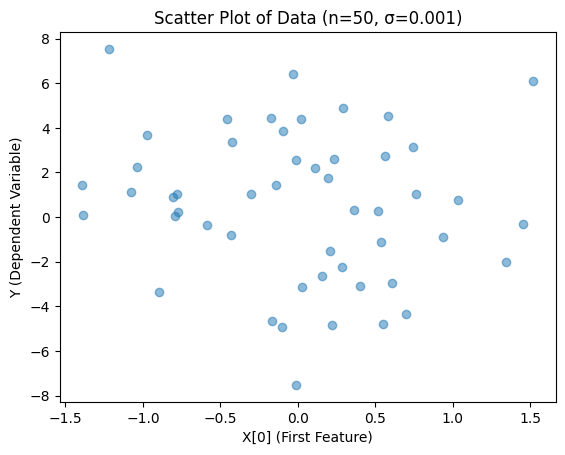

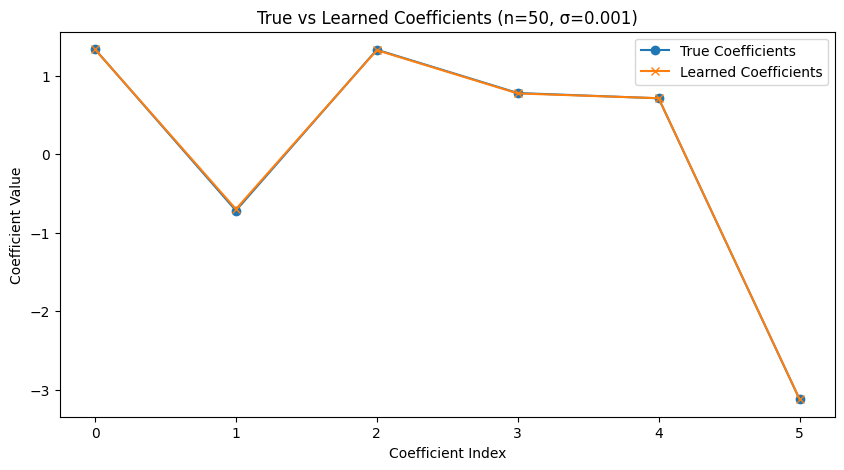


Sigma: 0.001, n: 100
True Beta: [-0.35526116 -0.76148354  0.07545588 -1.87159263  1.15630204  0.2635102 ]
Learned Beta: [-0.35335672 -0.76770605  0.07594238 -1.8725515   1.14770114  0.25360589]
Final Cost: 7.280856929772657e-05


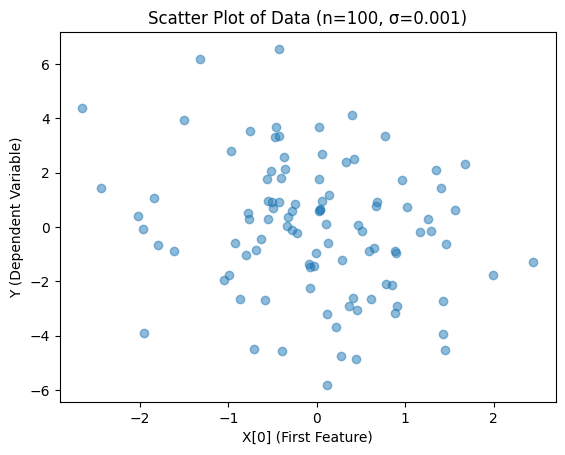

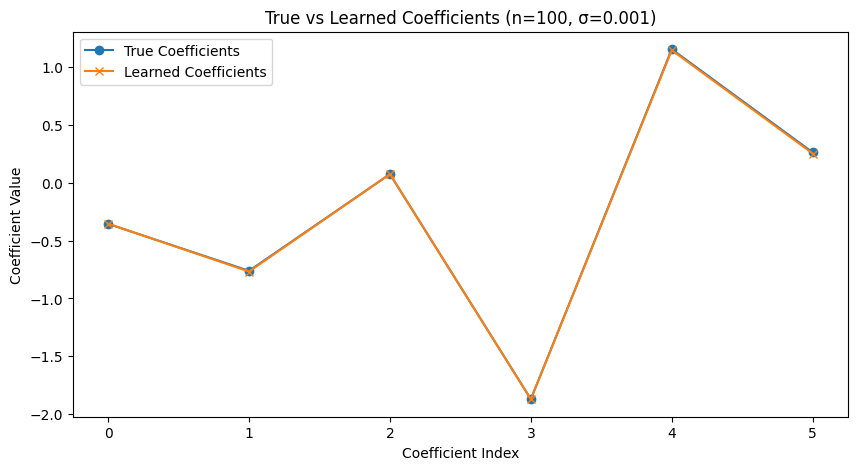


Sigma: 0.001, n: 500
True Beta: [ 0.19292274  0.08688197  0.27708425 -0.31713954  0.23014214  1.8705485 ]
Learned Beta: [ 0.19220491  0.09056904  0.275857   -0.3206523   0.23306982  1.86110113]
Final Cost: 5.582783091371296e-05


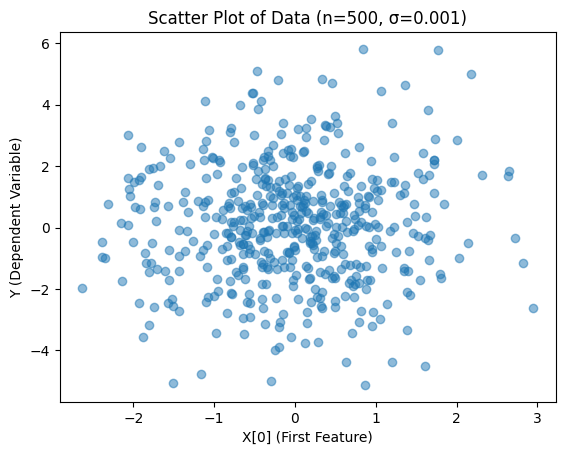

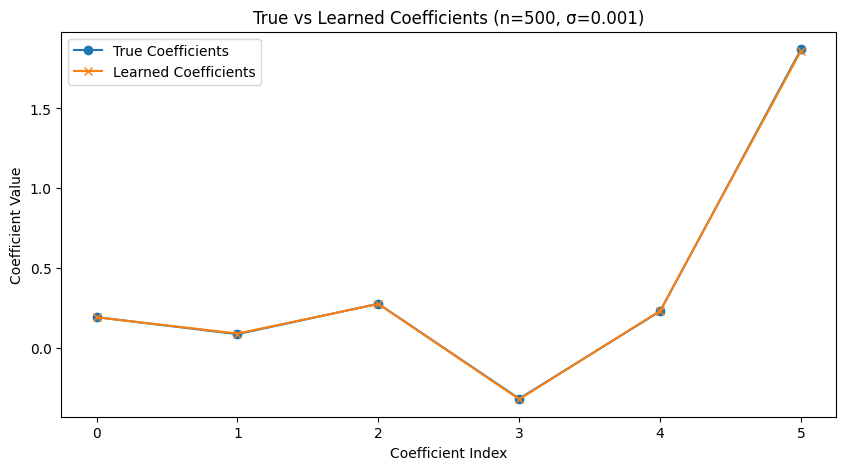


Sigma: 0.001, n: 1000
True Beta: [ 0.11117115  0.5559892   0.60581266 -0.88751776  0.74971463 -0.51268708]
Learned Beta: [ 0.11135151  0.55761437  0.60240739 -0.88250007  0.74170808 -0.51329889]
Final Cost: 5.0574166970910216e-05


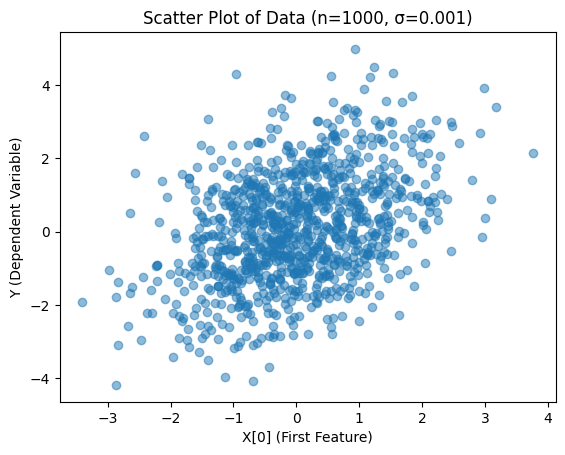

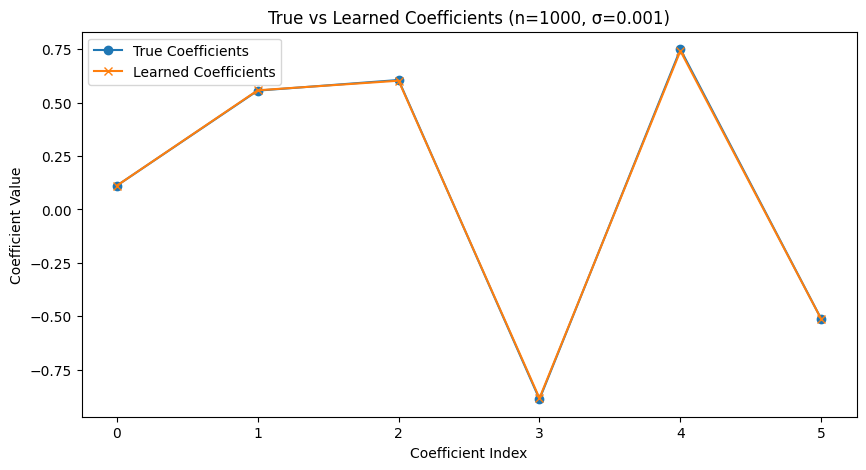


Sigma: 0.1, n: 50
True Beta: [-0.68266013  0.06853771 -0.86497281  0.28227114  0.31759045 -0.41468956]
Learned Beta: [-0.6896001   0.06855807 -0.85493319  0.29925352  0.30266965 -0.43257455]
Final Cost: 0.003387458977764913


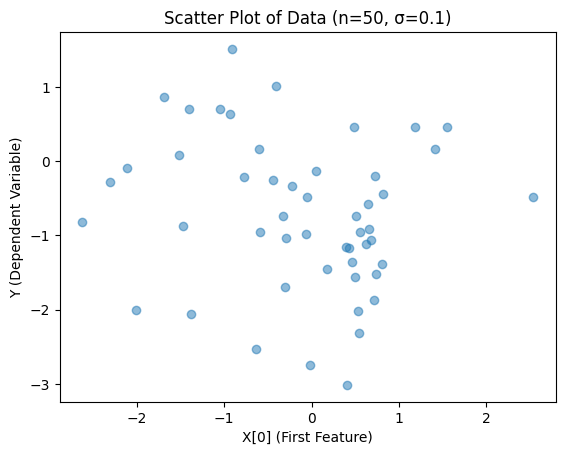

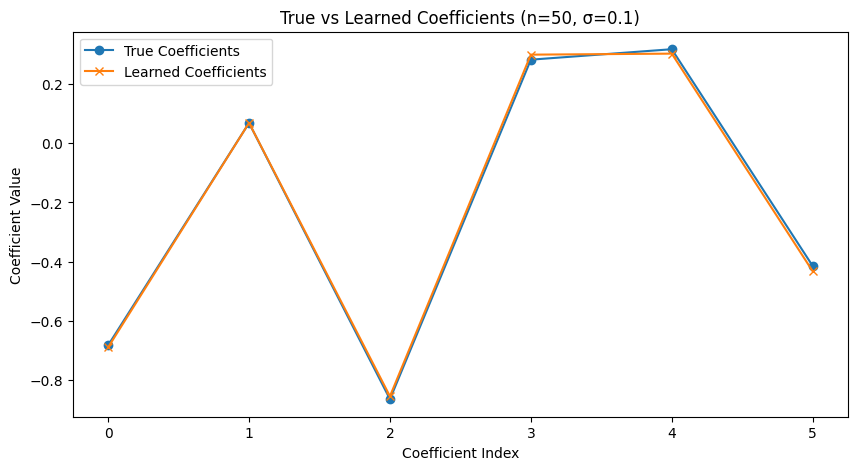


Sigma: 0.1, n: 100
True Beta: [-0.70152556  0.08679804  1.55024735 -1.22383826  0.72827314  0.02628576]
Learned Beta: [-0.70472579  0.09684166  1.55452985 -1.20634468  0.72334927  0.05023088]
Final Cost: 0.005325300474186506


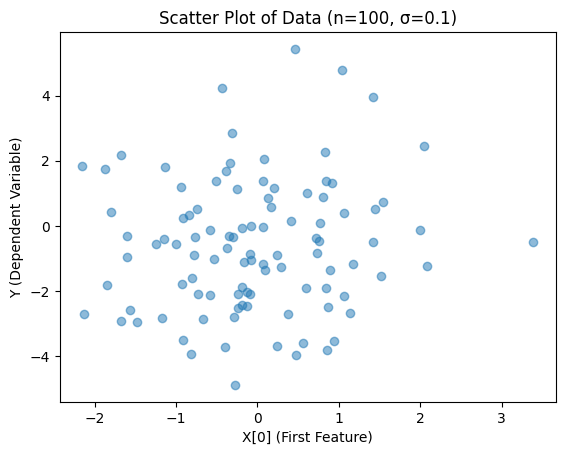

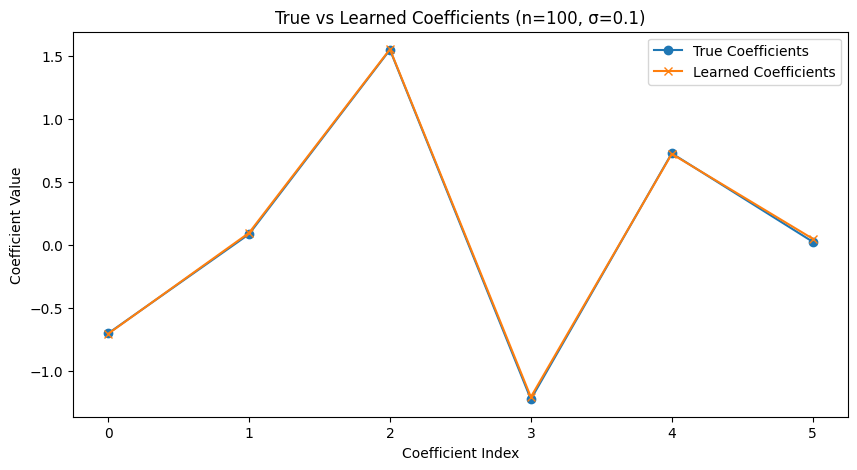


Sigma: 0.1, n: 500
True Beta: [-1.0308915   1.47688536  1.31366597  1.60237148 -0.81520661 -0.24247515]
Learned Beta: [-1.02083109  1.47516382  1.30624079  1.59818872 -0.80180284 -0.23632475]
Final Cost: 0.004426230308658349


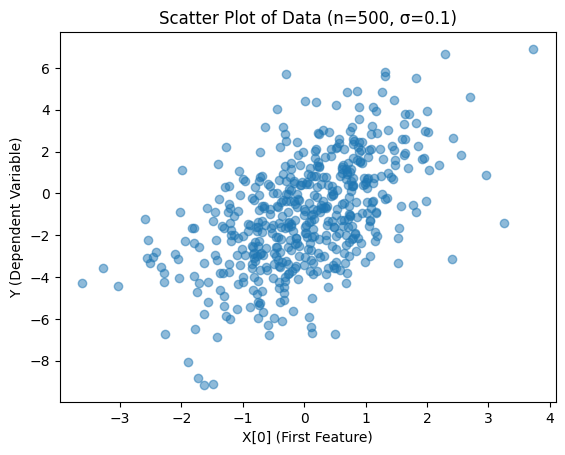

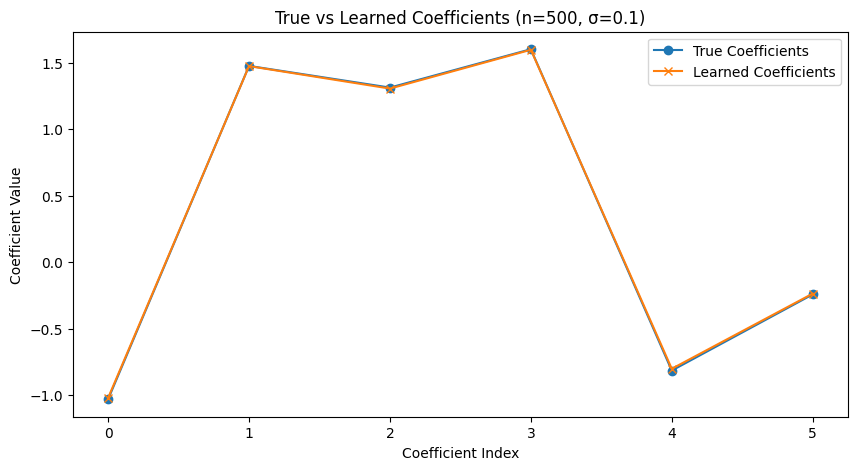


Sigma: 0.1, n: 1000
True Beta: [-0.07569616  0.14433213 -0.6708177   0.86102622 -0.68229534 -0.62423558]
Learned Beta: [-0.07188186  0.15638485 -0.66924018  0.86475001 -0.68227752 -0.63160686]
Final Cost: 0.0050470403552950495


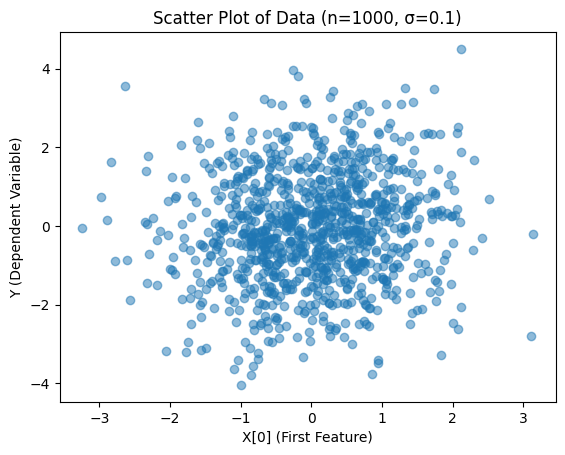

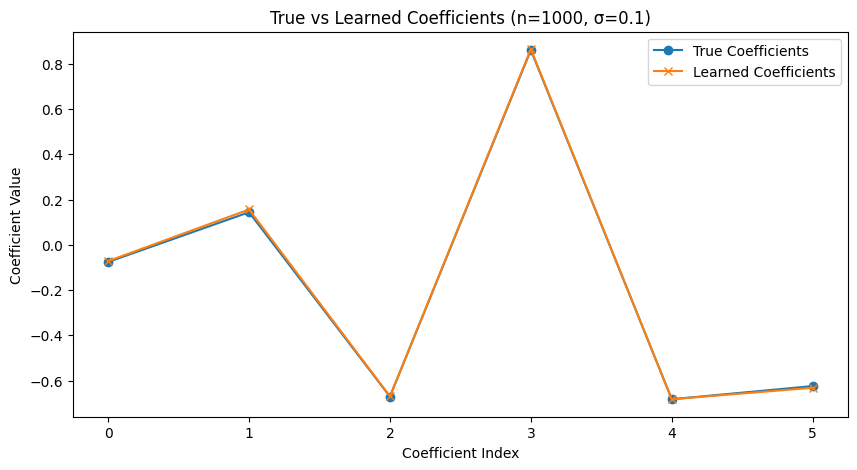


Sigma: 1.0, n: 50
True Beta: [-0.0516794   0.69028063 -1.06500231 -2.41349936  0.61189272  1.31346813]
Learned Beta: [ 0.05352912  0.5192022  -0.86953648 -2.3417054   0.49882541  1.42684909]
Final Cost: 0.2796688709445482


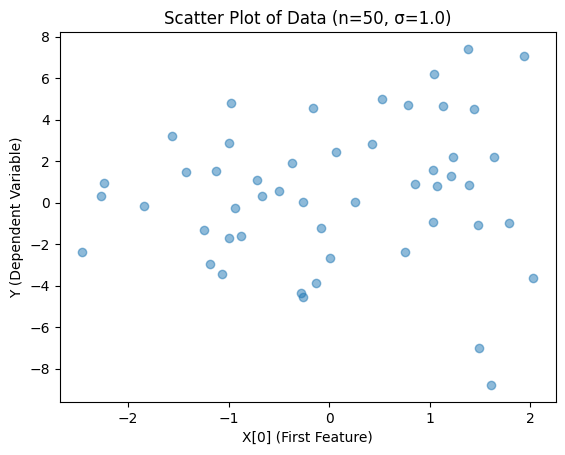

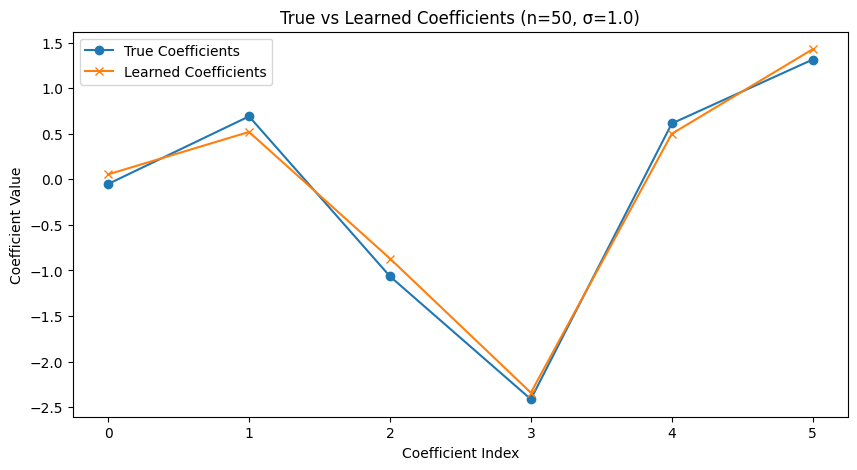


Sigma: 1.0, n: 100
True Beta: [ 1.12444941 -0.99019671 -1.1997841   1.32563034 -1.22327859 -0.1968158 ]
Learned Beta: [ 1.0164457  -1.1009897  -1.05112483  1.53251791 -1.30716251 -0.15811021]
Final Cost: 0.4567017745278186


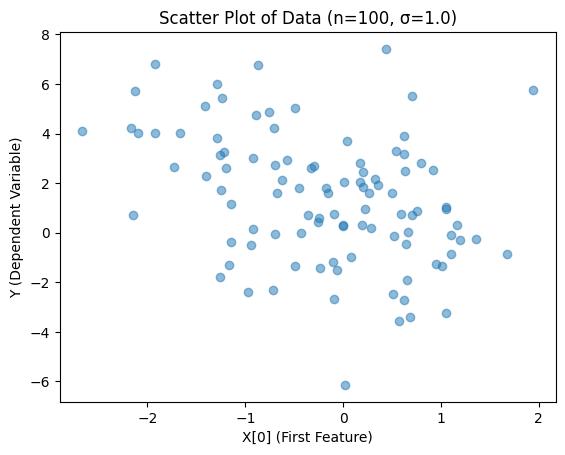

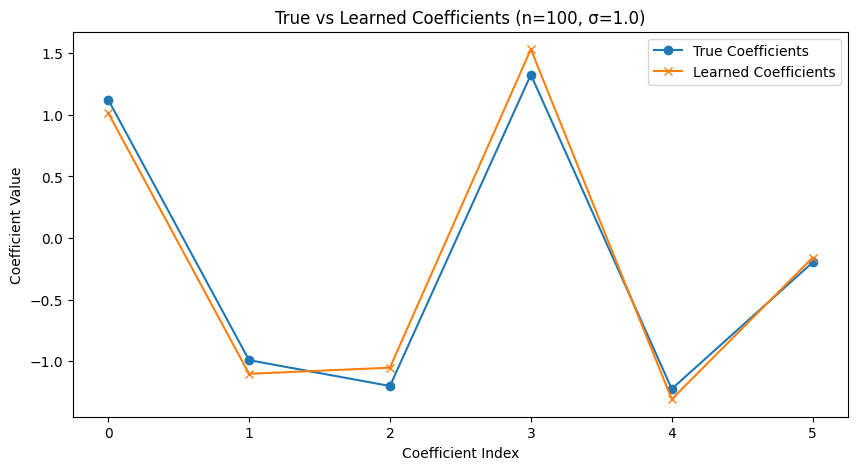


Sigma: 1.0, n: 500
True Beta: [ 0.41767853  0.29357221 -0.52833779 -2.30099387 -1.16516057 -2.41090542]
Learned Beta: [ 0.38574999  0.28653578 -0.47247438 -2.29519664 -1.16645348 -2.44360714]
Final Cost: 0.4719586805605957


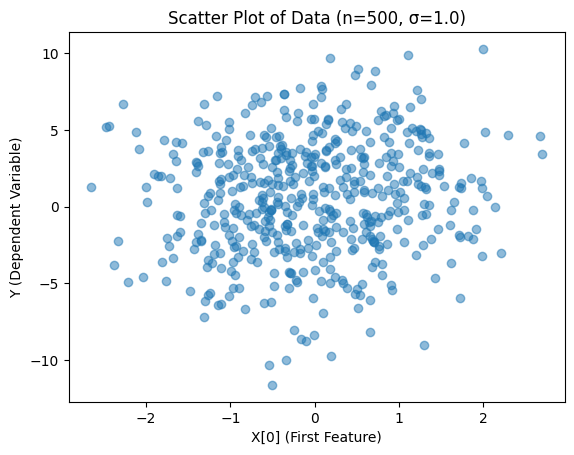

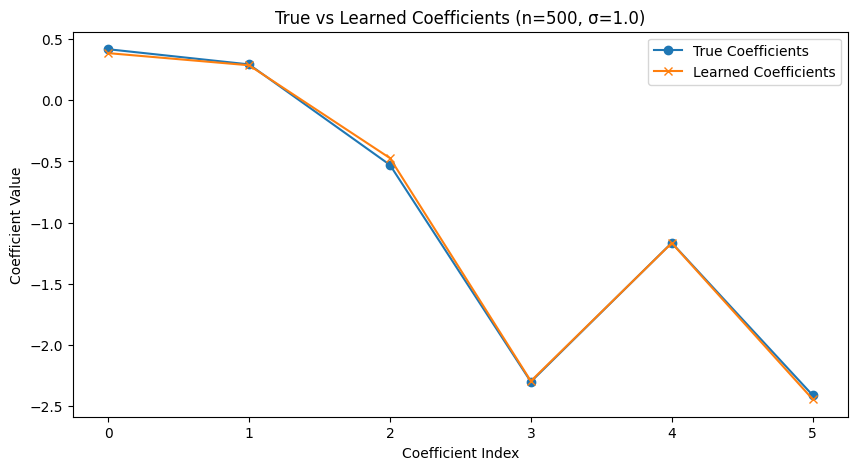


Sigma: 1.0, n: 1000
True Beta: [ 0.80886684  1.46787222 -0.05253212 -0.2866294   0.70814934  0.42796432]
Learned Beta: [ 0.72600272  1.50513937 -0.01786636 -0.32904739  0.70907614  0.36557319]
Final Cost: 0.55852138683808


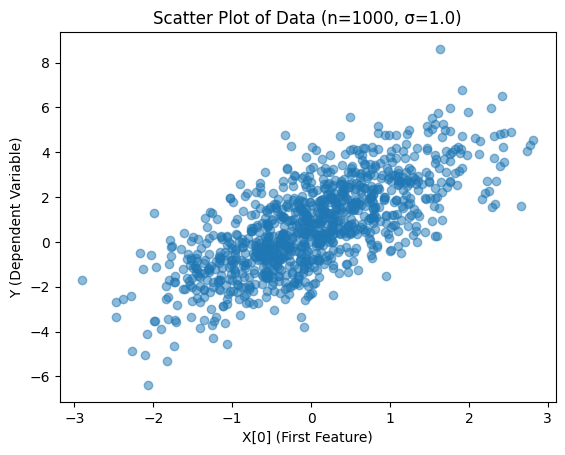

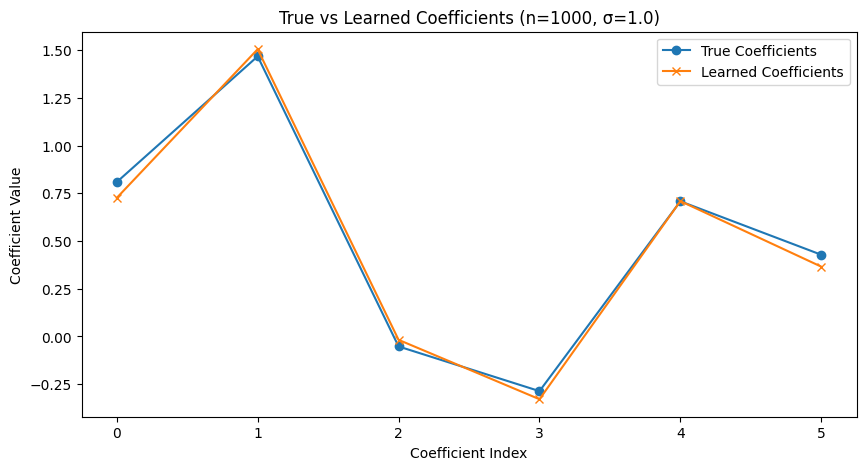


Sigma: 5.0, n: 50
True Beta: [ 1.05115763 -0.83461446 -0.3885174   1.02009501 -0.22411581  1.11244802]
Learned Beta: [ 0.53204749 -0.7219732  -1.5549384   0.74682898 -0.86661927  0.25858109]
Final Cost: 10.913782515237095


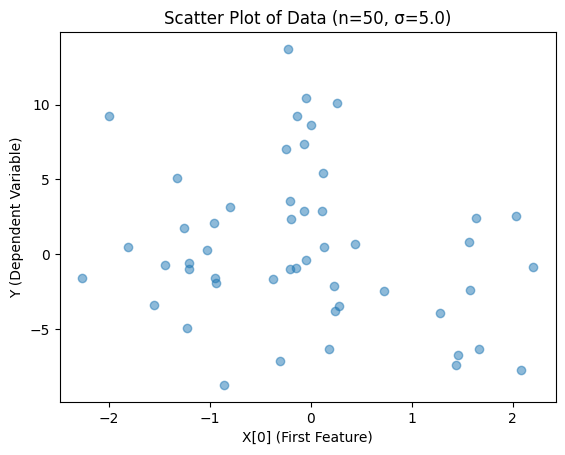

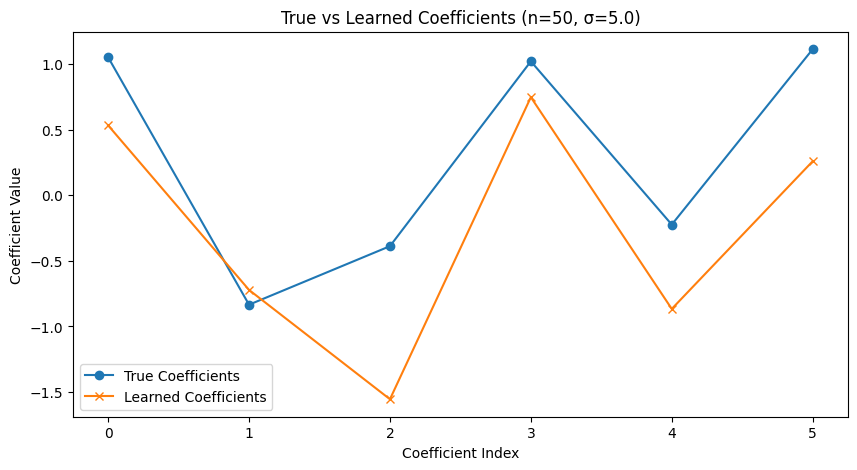


Sigma: 5.0, n: 100
True Beta: [-0.16372616 -0.71953593 -0.76715688 -0.26885409  0.40261301 -0.40035738]
Learned Beta: [ 0.45553793 -1.42538622  0.19973373  0.57423654 -0.64337175 -0.46338335]
Final Cost: 9.72612663666759


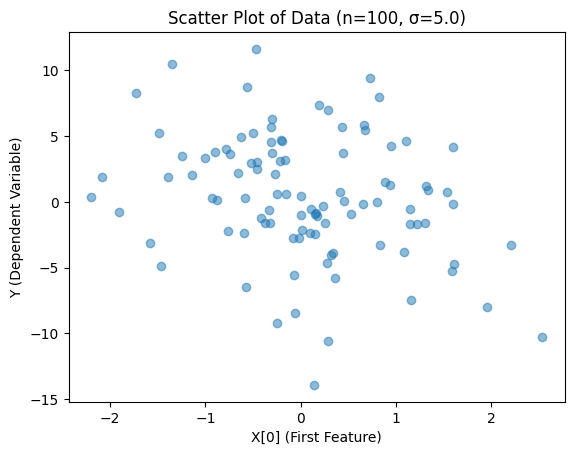

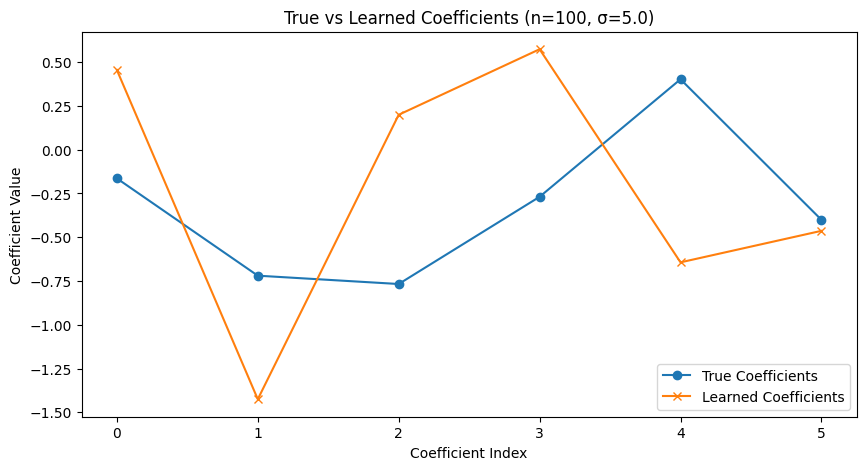


Sigma: 5.0, n: 500
True Beta: [-1.63393628 -1.27136633 -1.02311968  1.33731925  0.068496    0.11529115]
Learned Beta: [-1.82980125 -1.44169973 -1.47077349  1.29663486  0.08615443 -0.00435449]
Final Cost: 12.201208088561451


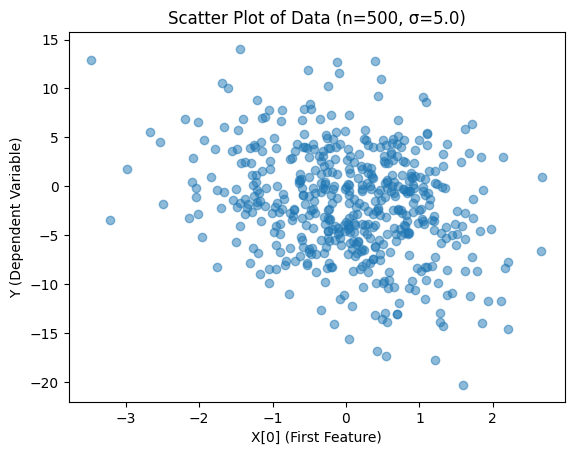

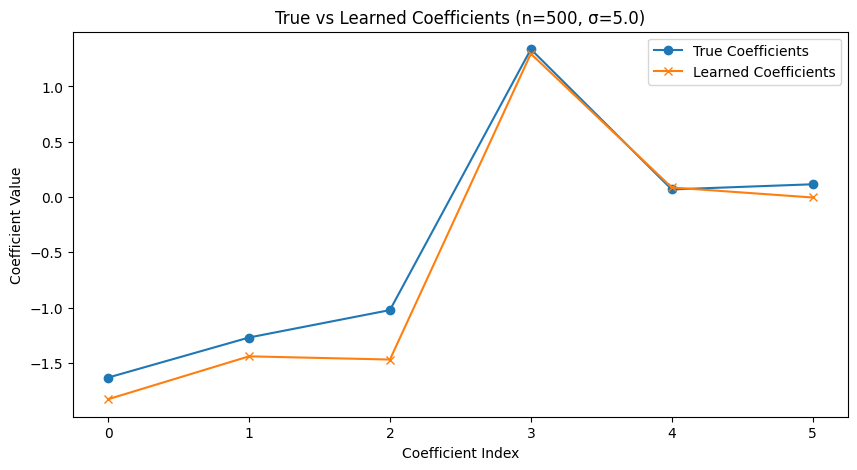


Sigma: 5.0, n: 1000
True Beta: [-1.43495023 -0.04437482 -0.66735272 -0.14976063 -2.43978617 -1.67554212]
Learned Beta: [-1.2785911  -0.15607613 -0.60855569 -0.02468064 -2.40991445 -1.35547572]
Final Cost: 12.201691782542921


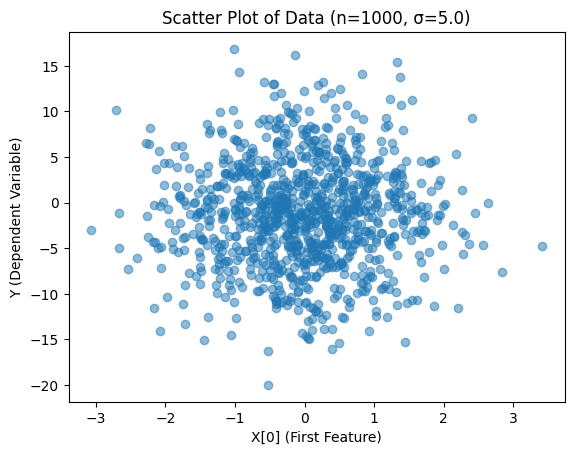

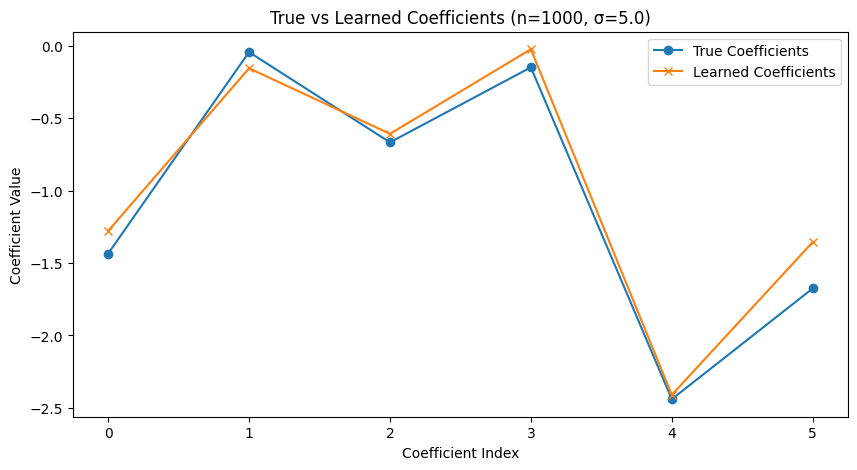

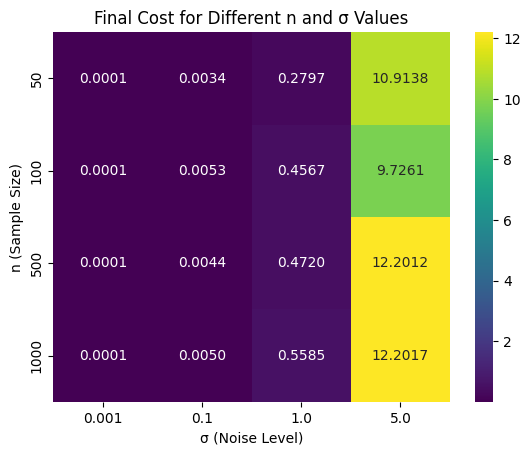

In [32]:
sigma_values = [0.001, 0.1, 1.0, 5.0]
n_values = [50, 100, 500, 1000]
investigate_and_eda(sigma_values, n_values, m, k, tau, learning_rate)


Sigma: 0.001, n: 50
True Beta: [ 1.24883888 -0.61978693  0.21235385 -1.80718921  1.41644866 -0.13482094]
Learned Beta: [ 1.23699185 -0.62711765  0.21889558 -1.80822821  1.416691   -0.13259644]
Final Cost: 7.666462979746369e-05


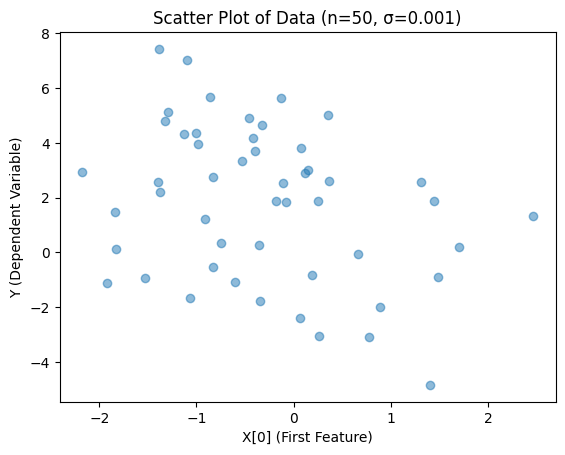

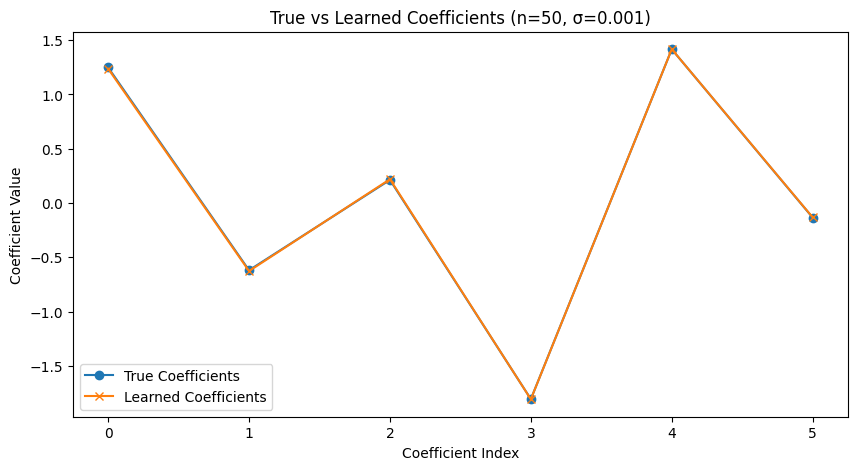


Sigma: 0.001, n: 100
True Beta: [ 0.06635391  0.21837398  0.39605593 -0.1666126  -0.32606912 -1.57210915]
Learned Beta: [ 0.07368722  0.22035373  0.39731831 -0.15723836 -0.32995735 -1.57058002]
Final Cost: 6.319861259560617e-05


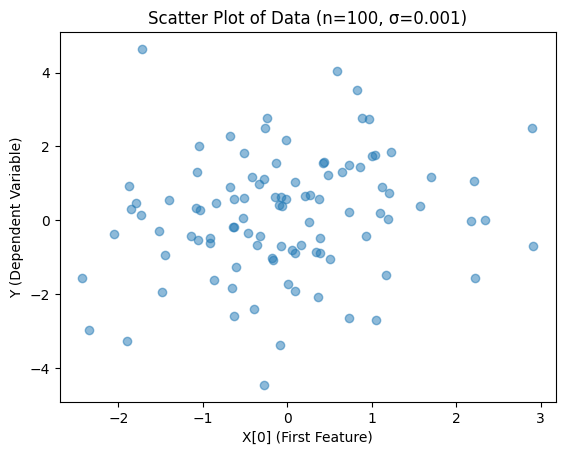

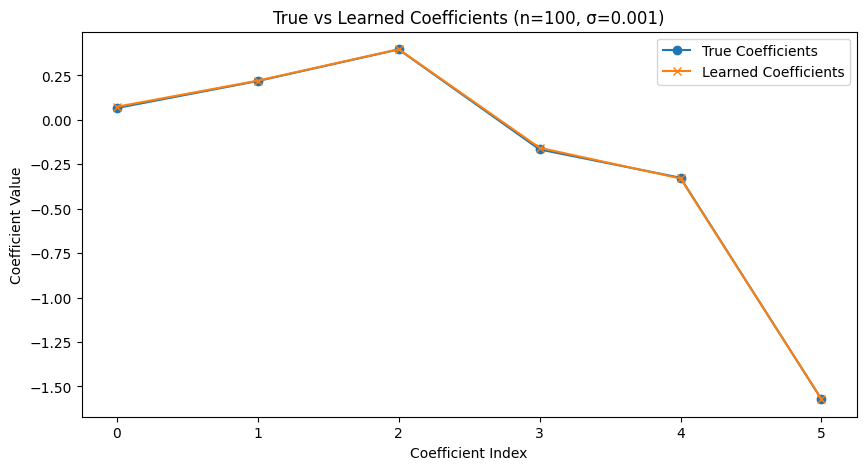


Sigma: 0.001, n: 500
True Beta: [ 1.14361418  0.05385773 -1.08041763 -0.76998269 -0.4995484  -0.10854519]
Learned Beta: [ 1.13958869  0.04670331 -1.07592889 -0.76700115 -0.4955114  -0.11010449]
Final Cost: 5.342639199807862e-05


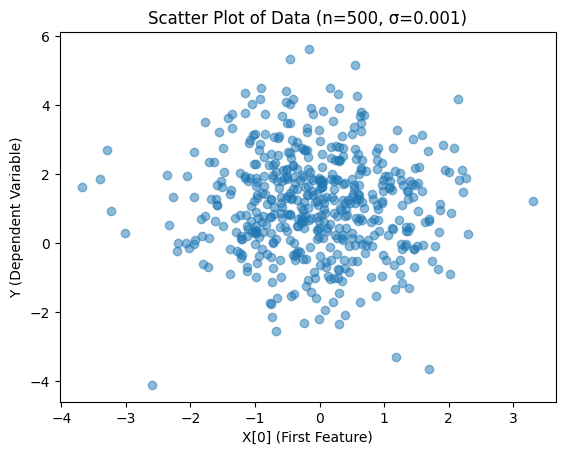

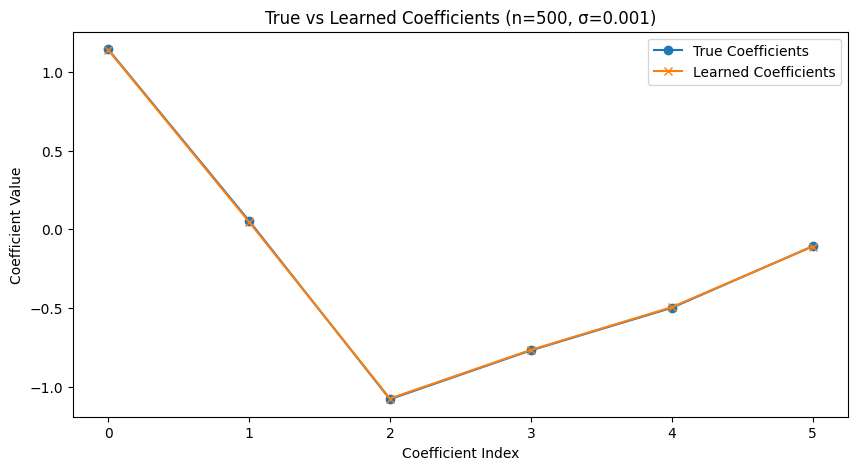


Sigma: 0.001, n: 1000
True Beta: [ 0.63269348  0.07677837  2.33732628 -0.48147089 -0.49050771 -0.8801625 ]
Learned Beta: [ 0.62829366  0.07626805  2.33160091 -0.47378223 -0.48988916 -0.8792855 ]
Final Cost: 5.2536418924423884e-05


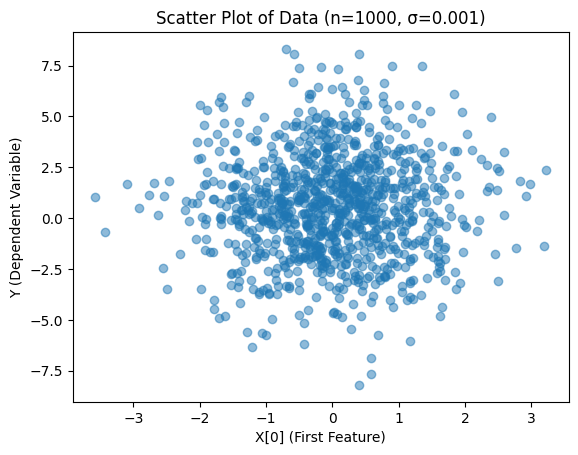

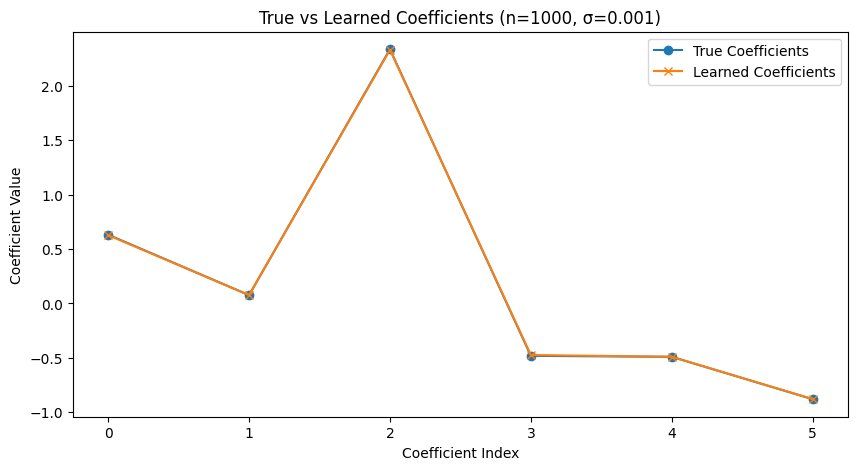


Sigma: 0.1, n: 50
True Beta: [-0.13446849 -0.79064887 -1.17804703 -0.74235864 -1.77416318 -0.86495509]
Learned Beta: [-0.15875219 -0.78576266 -1.16413003 -0.75240189 -1.75073218 -0.84113503]
Final Cost: 0.004377462806487002


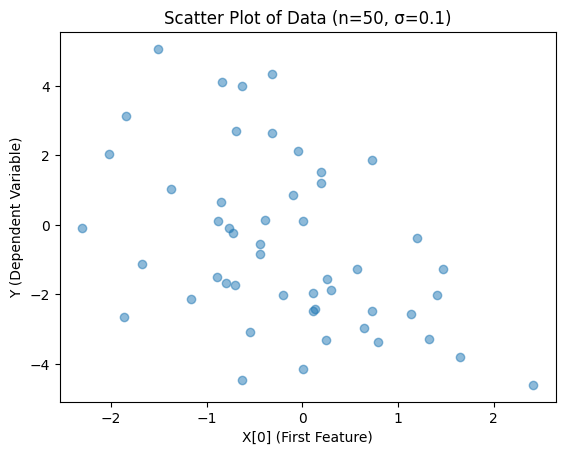

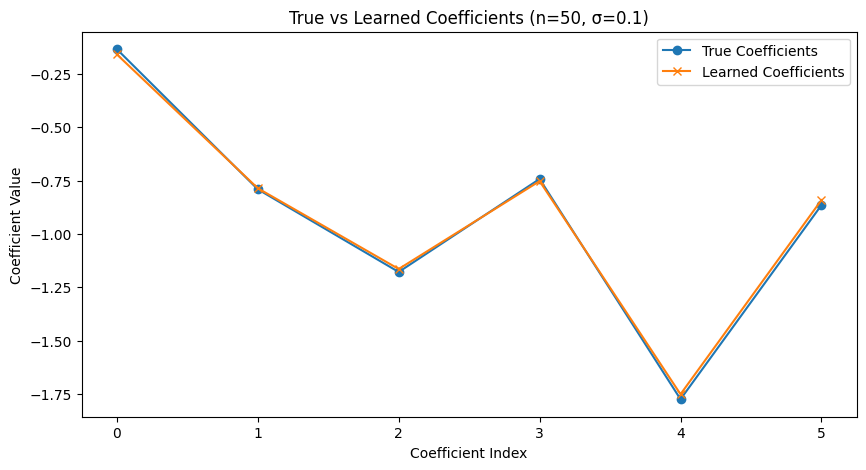


Sigma: 0.1, n: 100
True Beta: [0.40772076 0.03899175 0.77848372 1.53995743 0.64580964 1.40794061]
Learned Beta: [0.4120723  0.02061157 0.7469027  1.52180434 0.64338146 1.3900537 ]
Final Cost: 0.004611221097431244


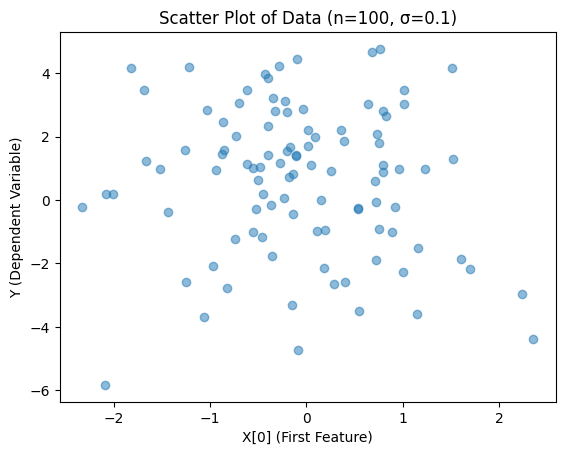

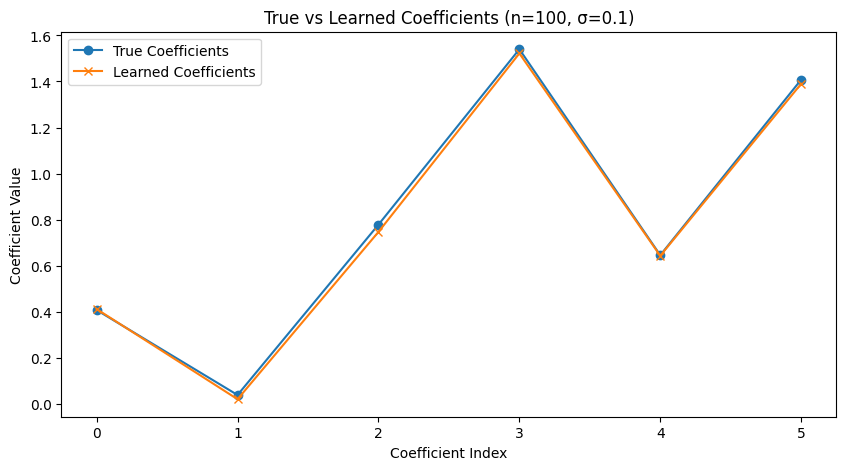


Sigma: 0.1, n: 500
True Beta: [ 0.0754075  -0.13087368  0.25533689  0.64553905 -1.1466328  -0.19851282]
Learned Beta: [ 0.07207063 -0.12815003  0.24239898  0.63650812 -1.1386025  -0.20484364]
Final Cost: 0.004902826523067534


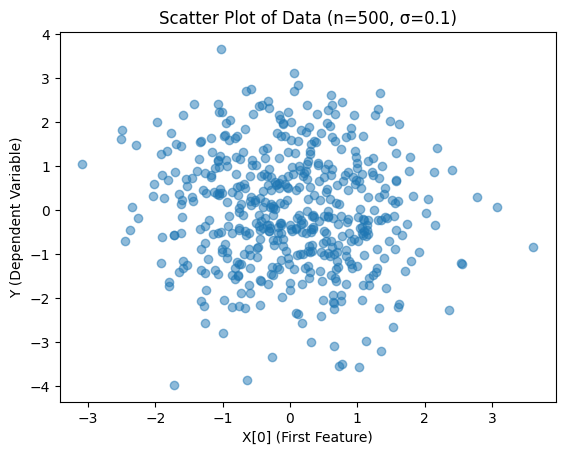

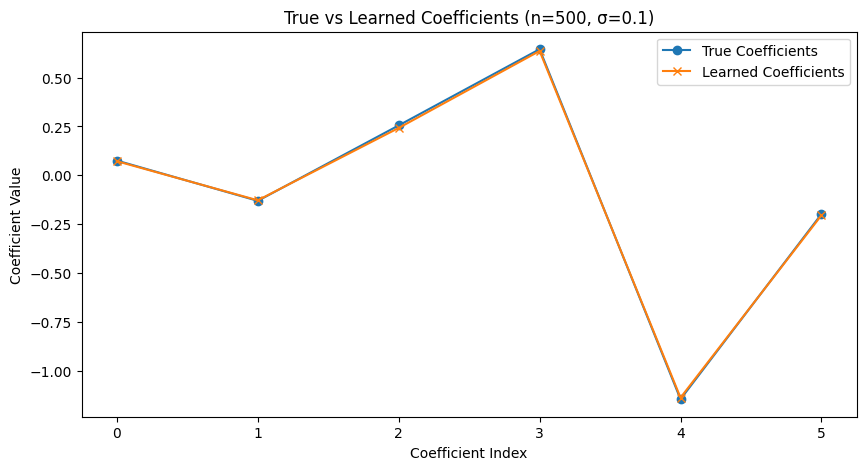


Sigma: 0.1, n: 1000
True Beta: [ 0.4559823  -0.15678297 -2.24355563  0.77749491 -0.45488068 -1.63304096]
Learned Beta: [ 0.4480683  -0.15325401 -2.23010033  0.78150887 -0.45486609 -1.63087845]
Final Cost: 0.004986053102593374


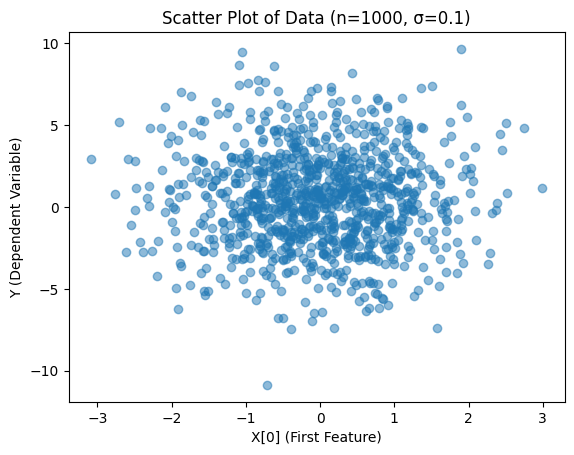

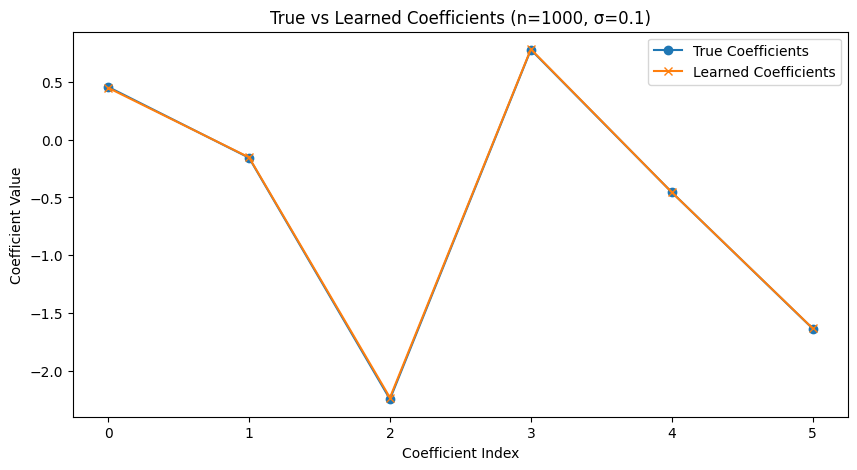


Sigma: 1.0, n: 50
True Beta: [-0.36925492 -0.41634504 -0.09005796  0.07481302  1.67823028  0.02891867]
Learned Beta: [-0.23091938 -0.47067201 -0.16391227  0.1260127   1.54568604  0.40813252]
Final Cost: 0.5089422369838844


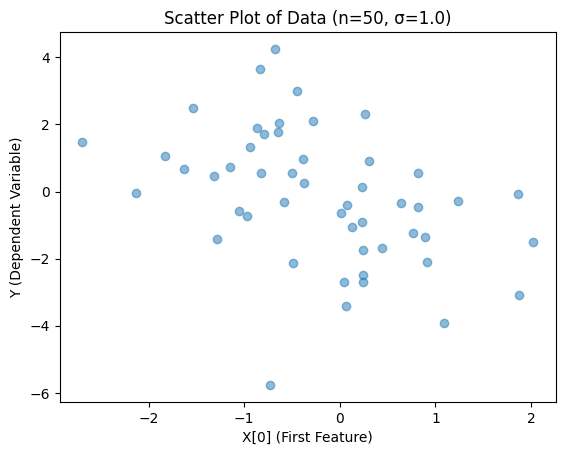

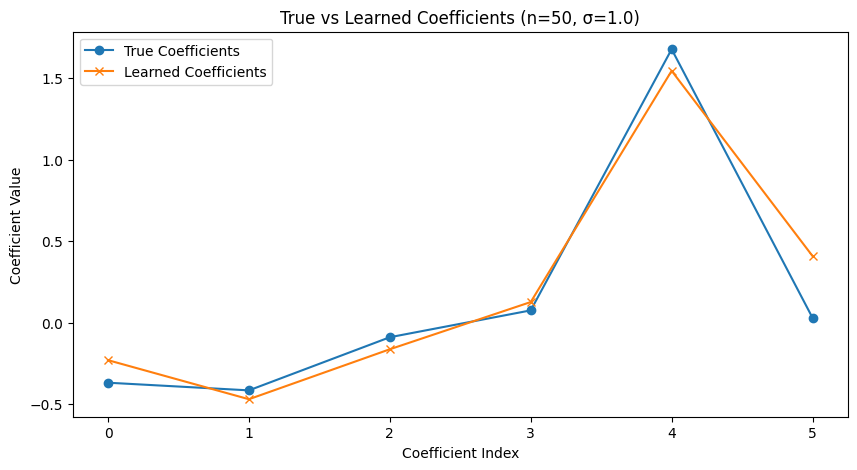


Sigma: 1.0, n: 100
True Beta: [ 0.17894533 -1.29323295  1.62389761 -0.55953058 -0.84898522 -0.39767698]
Learned Beta: [ 0.17694302 -1.18678665  1.71457531 -0.47581957 -0.92050544 -0.39878431]
Final Cost: 0.41023148482708277


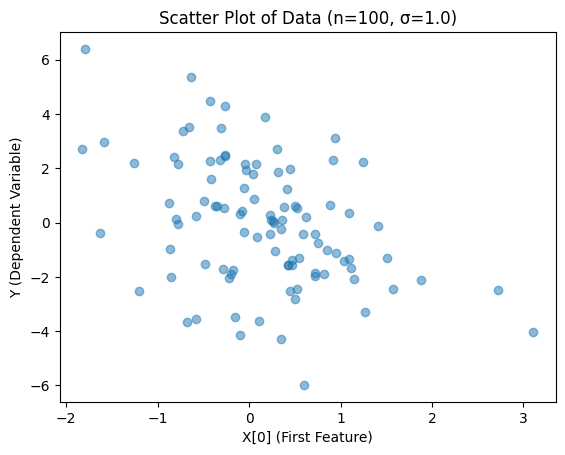

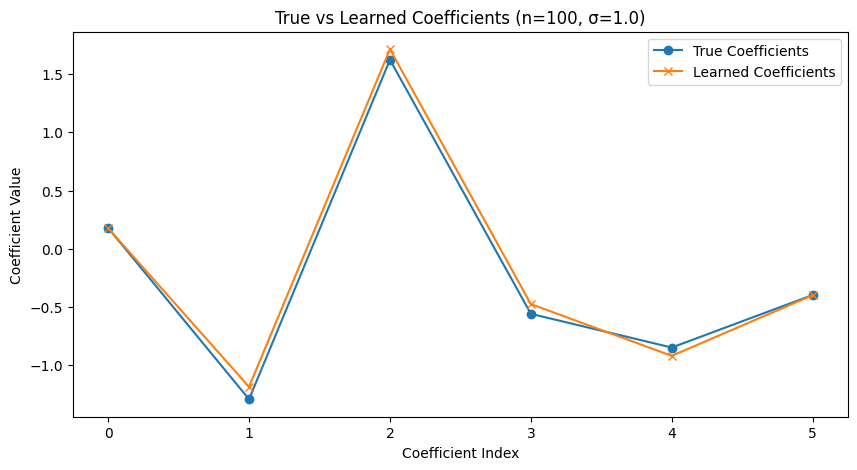


Sigma: 1.0, n: 500
True Beta: [ 1.68508185  1.01100964 -0.28098478  0.4021393  -1.20345729 -0.2297172 ]
Learned Beta: [ 1.6870356   1.08057409 -0.25139174  0.41847951 -1.1409551  -0.29178387]
Final Cost: 0.4821322624161435


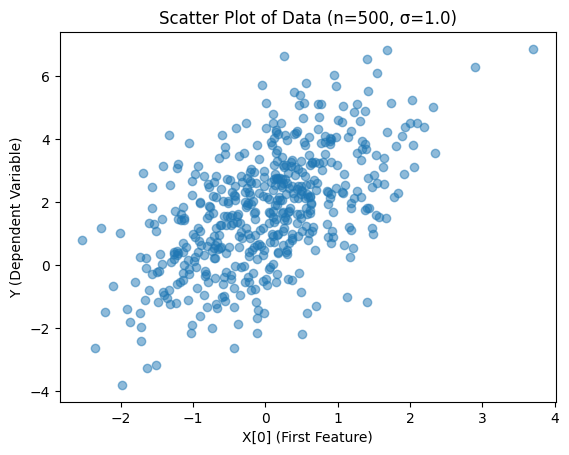

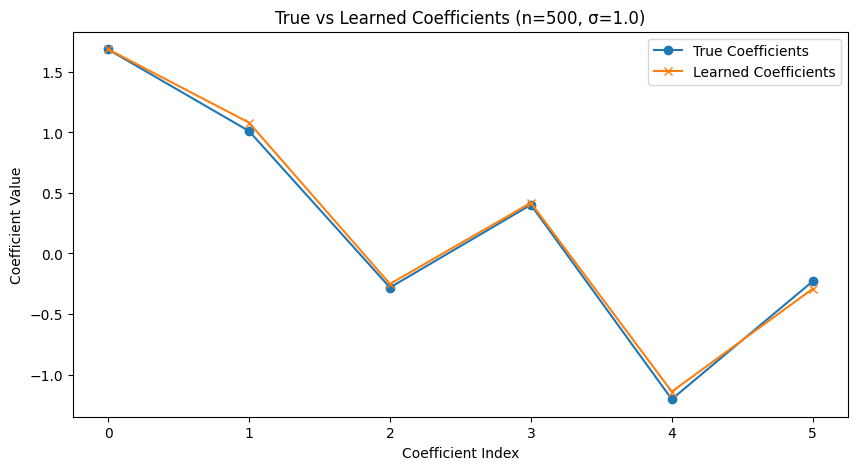


Sigma: 1.0, n: 1000
True Beta: [ 0.82711322 -1.44653438  2.84872786 -0.66586322  1.428018   -0.01749645]
Learned Beta: [ 0.79382235 -1.44903553  2.85738163 -0.66072276  1.38756979 -0.04542863]
Final Cost: 0.4857412041831817


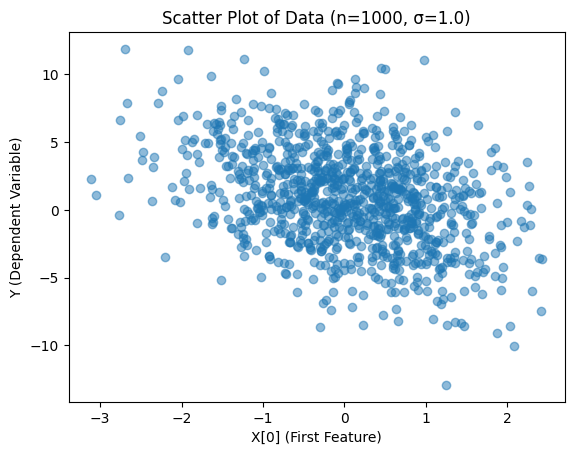

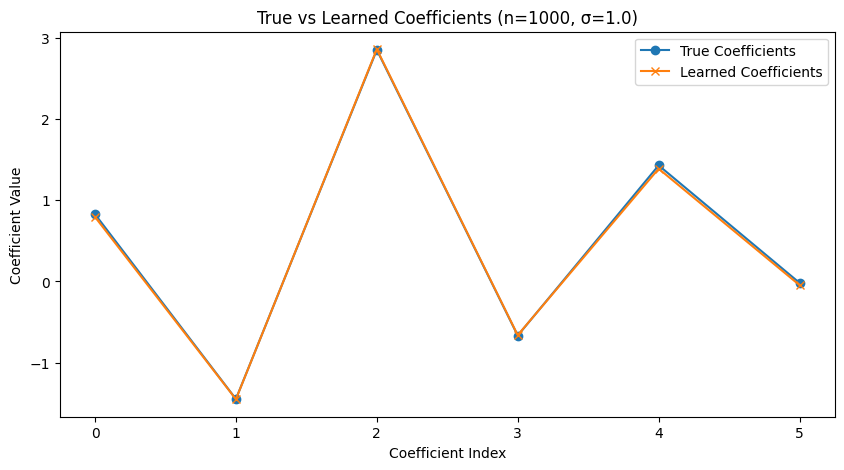


Sigma: 5.0, n: 50
True Beta: [-1.35155044  0.27353233 -1.26450933  0.98332266 -0.4406487   1.30153771]
Learned Beta: [-2.99991044  1.4881534  -0.10411859  0.34013781  0.40517734  1.14448688]
Final Cost: 14.640734906473421


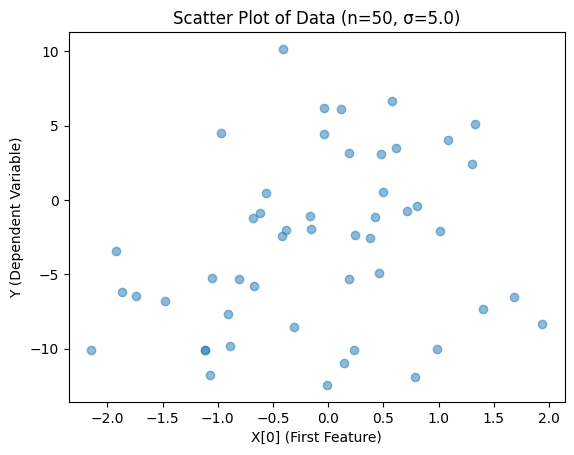

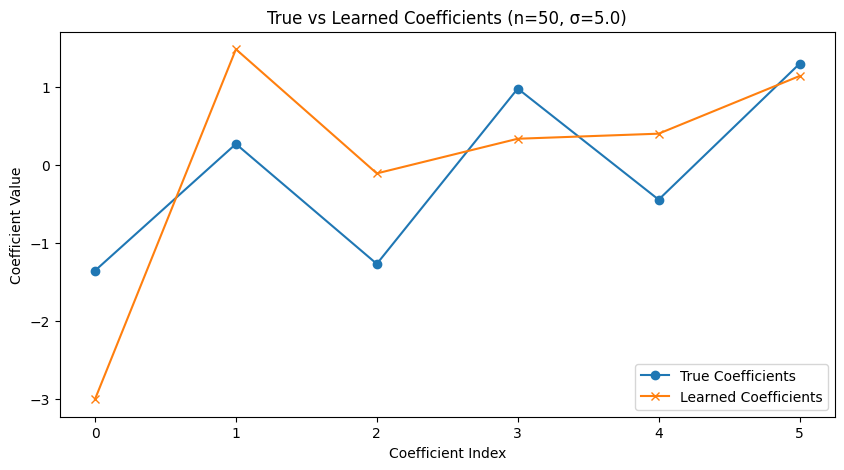


Sigma: 5.0, n: 100
True Beta: [ 0.44104752 -0.00847474  1.40341608 -0.04797399 -0.03129713 -2.10860623]
Learned Beta: [ 0.13337081  0.12897352  1.5900068   0.62340335 -0.71880341 -1.47215985]
Final Cost: 13.15773212655738


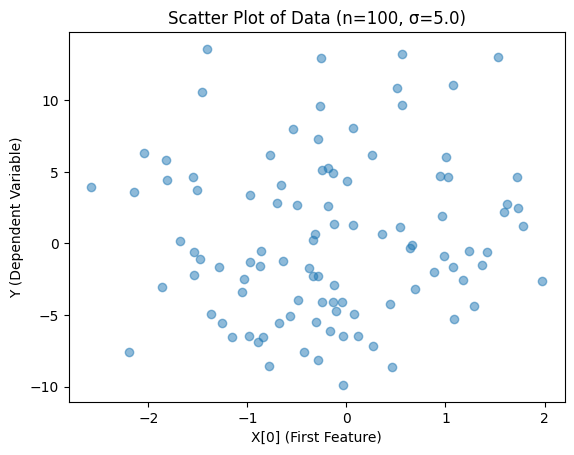

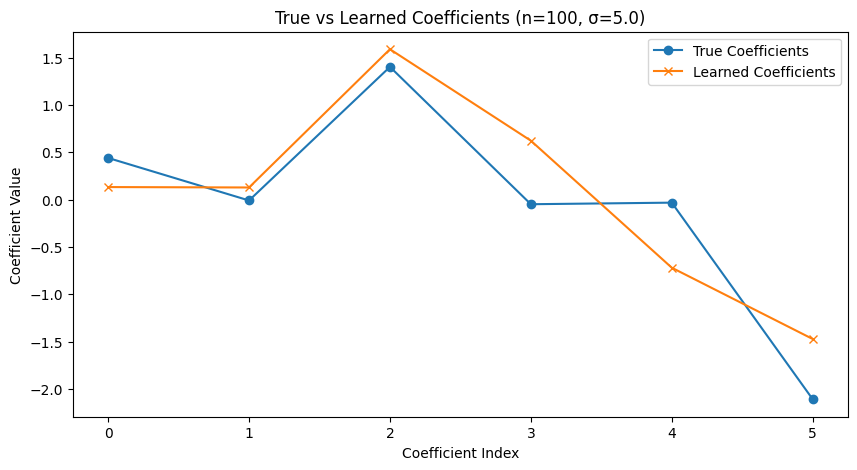


Sigma: 5.0, n: 500
True Beta: [ 0.74631082  0.05258837 -0.21948823 -1.10518127  1.25560311 -0.62940214]
Learned Beta: [ 1.07615125 -0.17832165 -0.15411851 -0.63302395  0.95306661 -1.01979841]
Final Cost: 11.602519638509664


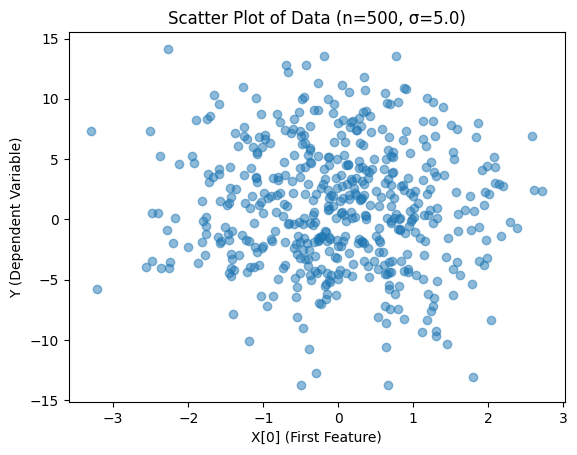

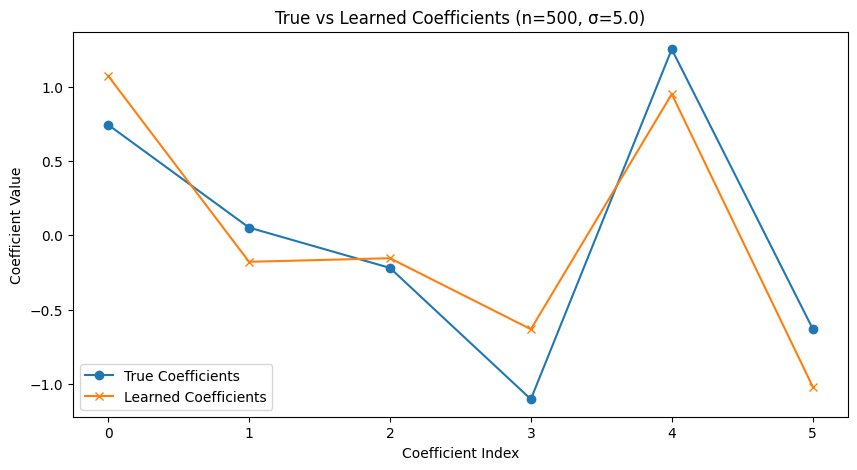


Sigma: 5.0, n: 1000
True Beta: [-0.93187618 -0.96733009 -0.50831583  3.03467592  1.27718281  0.72285889]
Learned Beta: [-0.58393106 -0.98471032 -0.28588177  3.12454636  1.34858405  0.449271  ]
Final Cost: 12.517624028539005


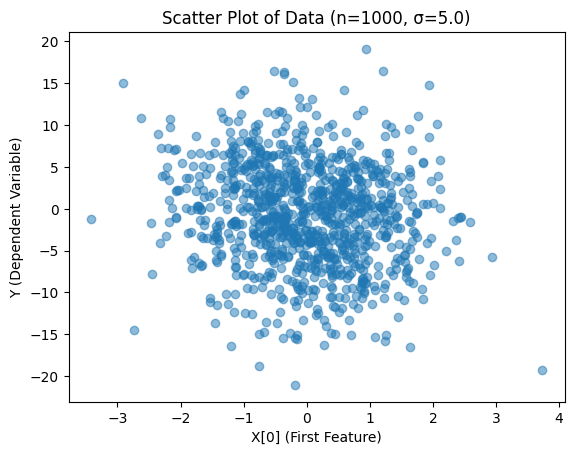

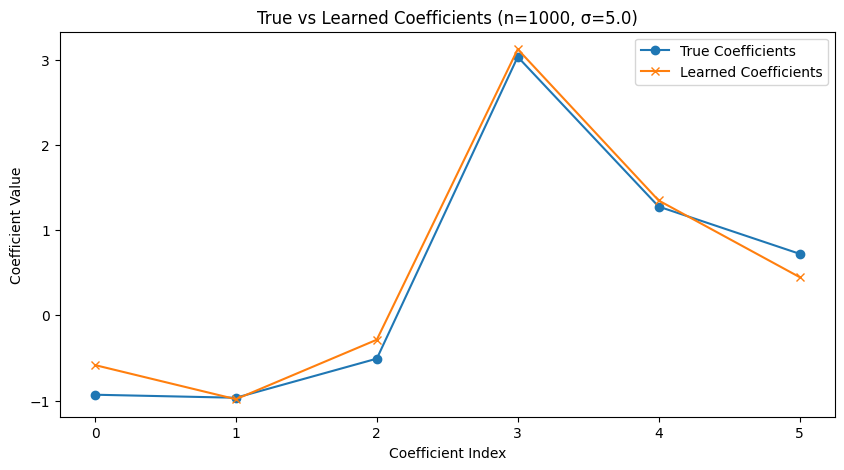

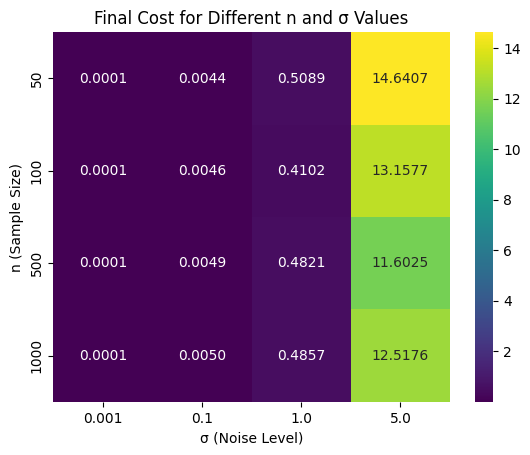

In [33]:
# 2. Comparing True vs. Learned Coefficients
def plot_coefficients(beta_true, beta_learned, n, sigma):
    plt.figure(figsize=(10, 5))
    plt.plot(beta_true, label='True Coefficients', marker='o')
    plt.plot(beta_learned, label='Learned Coefficients', marker='x')
    plt.title(f"True vs Learned Coefficients (n={n}, σ={sigma})")
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Value")
    plt.legend()
    plt.show()

sigma_values = [0.001, 0.1, 1.0, 5.0]
n_values = [50, 100, 500, 1000]
investigate_and_eda(sigma_values, n_values, m, k, tau, learning_rate)